<a href="https://colab.research.google.com/github/marcmec/PrognosticSepsis/blob/main/Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import io 
from google.colab import files 
import csv
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from math import e
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize


In [ ]:
pd.set_option('display.max_rows', None)


In [ ]:
apacheAdmit = pd.read_csv('apacheMaisAdmitTime.csv')

In [ ]:
print(apacheAdmit)

In [ ]:
apacheAdmit = apacheAdmit.replace(to_replace = ['ALIVE','EXPIRED'],value = ['1','0'])

In [ ]:
apacheAdmit = apacheAdmit.replace(to_replace = ['Male','Female'],value = ['1','0'])

In [ ]:
apacheAdmit = apacheAdmit.replace(to_replace = ['> 89'],value = ['90'])

In [ ]:
print(apacheAdmit)

In [ ]:
apacheAdmit.loc[apacheAdmit['hospitaldischargeoffset'] > 2880, 'hospitaldischargeoffset'] = '1'

In [ ]:
print(apacheAdmit)

In [ ]:
apacheAdmit.loc[(apacheAdmit['hospitaldischargeoffset'] != '1'), 'hospitaldischargeoffset'] = '0'

In [ ]:
print(apacheAdmit)

In [ ]:
txLogit = -32.6659 + np.log(apacheAdmit['acutephysiologyscore'] +20.5958)*7.3068

In [ ]:
txMortality= e**txLogit/(1+e**txLogit)

In [ ]:
print(txMortality)

In [ ]:
apacheAdmit.insert(7,'txMortality',txMortality)

In [ ]:
print(apacheAdmit)

In [ ]:
# X = apacheAdmit[["actualhospitalmortality",'txMortality']]
# y = apacheAdmit['hospitaldischargeoffset']
X = apacheAdmit[["hospitaldischargeoffset","gender",'txMortality']]
y = apacheAdmit['actualhospitalmortality']
# X = apacheAdmit[["hospitaldischargeoffset",'txMortality']]
# y = apacheAdmit['actualhospitalmortality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


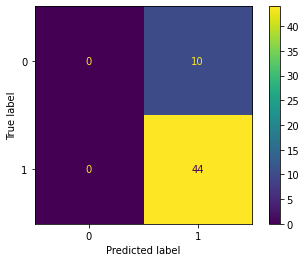

In [ ]:
plot_confusion_matrix(logistic_regression, X_test, y_test)  
plt.show()

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [ ]:
logistic_regression.score(X,y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)


In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
classifier.score(X,y)

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

In [ ]:
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

In [ ]:
accuracy = str(round(classifier.score(X_test,y_test) * 100, 2))+"%"


In [ ]:
print(accuracy)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clfSVM = svm.SVC(gamma='auto',     probability=True
)

In [ ]:
cv_result = cross_val_score(clfSVM, apacheAdmit, apacheAdmit['actualhospitalmortality'], cv=10, scoring="accuracy")

#Retorna a acurácia em porcentagem do nosso modelo
print("Acurácia com cross validation:", cv_result.mean()*100)

Acurácia com cross validation: 87.02614379084969


In [ ]:
clfSVM.fit(apacheAdmit, apacheAdmit['actualhospitalmortality'])

SVC(gamma='auto', probability=True)

In [ ]:
clfSVM.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [ ]:
y_predSVM = clfSVM.predict(X_test)

In [ ]:
classifiersvm = metrics.RocCurveDisplay.from_estimator(clfSVM, X_test, y_test)


In [ ]:
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=50, cluster_std=0.60)

In [ ]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clfSVM)


In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = svm.SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [100, 177]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
plot_confusion_matrix(clfSVM,X_test, y_test)

plt.show()
print(classification_report(y_test,y_predSVM))

In [ ]:
lw = 2
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Característica da Curva ROC para análise a eficiência de modelos preditivos")
plt.legend(loc="lower right")
plt.show()